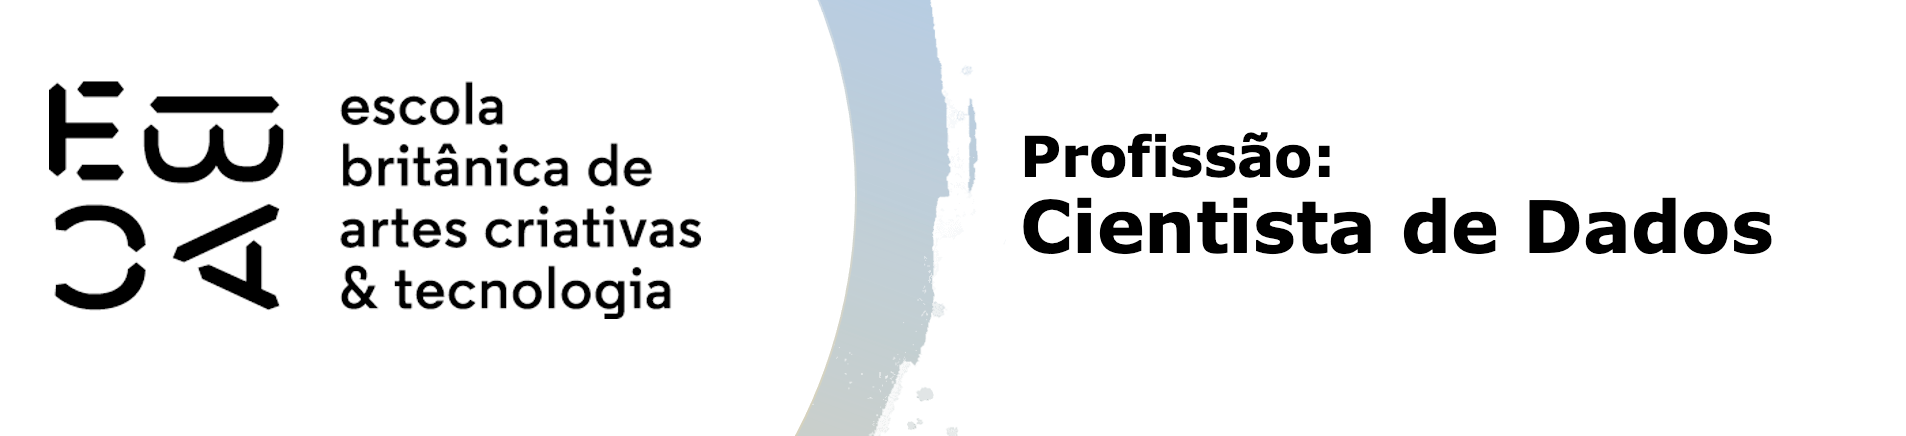

# Tarefa - Agrupamento hierárquico

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo agora é agrupar as sessões de acesso ao portal considerando o comportamento de acesso e informações da data, como a proximidade a uma data especial, fim de semana e o mês.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [28]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [29]:
# Carregando os dados
df = pd.read_csv('online_shoppers_intention.csv')

# Preenchendo valores ausentes com a média das colunas numéricas
numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
df[numeric_vars] = df[numeric_vars].fillna(df[numeric_vars].mean())

# Verificando valores ausentes em cada variável após preenchimento
print(df.isnull().sum())

# Verificando a distribuição da variável 'Revenue'
print(df['Revenue'].value_counts(dropna=False))

# Verificando a distribuição das outras variáveis categóricas
categorical_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']
for var in categorical_vars:
    print(df[var].value_counts(dropna=False))

# Verificando informações gerais do DataFrame após tratamento
print(df.info())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Revenue
False    10422
True      1908
Name: count, dtype: int64
Month
May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: count, dtype: int64
OperatingSystems
2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: count, dtype: int64
Browser
2     7961
1     2462
4      736
5      467
6      174
10     163
8      135
3      105
13      61
7       4

## Variáveis de agrupamento

Liste as variáveis que você vai querer utilizar. Essa é uma atividade importante do projeto, e tipicamente não a recebemos pronta. Não há resposta pronta ou correta, mas apenas critérios e a sua decisão. Os critérios são os seguintes:

- Selecione para o agrupamento variáveis que descrevam o padrão de navegação na sessão.
- Selecione variáveis que indiquem a característica da data.
- Não se esqueça de que você vai precisar realizar um tratamento especial para variáveis qualitativas.
- Trate adequadamente valores faltantes.

In [30]:
# Selecionando variáveis de agrupamento
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

# Filtrando o DataFrame com as variáveis selecionadas
grouping_df = df[selected_vars].copy()

# Preenchendo valores ausentes com a média das colunas numéricas
numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df.loc[:, numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

# Convertendo variável 'Month' para valor numérico (1 a 12)
month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)

# Convertendo variável 'Weekend' para numérico (0 ou 1)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Verificando valores ausentes em cada variável após tratamento
print(grouping_df.isnull().sum())

# Verificando informações gerais do DataFrame após tratamento
print(grouping_df.info())


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
Weekend                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null

## Número de grupos

Nesta atividade vamos adotar uma abordagem bem pragmática e avaliar agrupamentos hierárquicos com 3 e 4 grupos, por estarem bem alinhados com uma expectativa e estratégia do diretor da empresa. 

*Atenção*: Cuidado se quiser fazer o dendrograma, pois com muitas observações ele pode ser mais complicado de fazer, e dependendo de como for o comando, ele pode travar o *kernell* do seu python.

In [32]:
warnings.simplefilter(action='ignore', category=FutureWarning)

# Selecionando variáveis de agrupamento e realizar tratamentos
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

grouping_df = df[selected_vars].copy()

numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df[numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Realizando agrupamento hierárquico com 3 grupos
agg_clustering_3 = AgglomerativeClustering(n_clusters=3)
grouping_df['Group_3'] = agg_clustering_3.fit_predict(grouping_df)

# Realizando agrupamento hierárquico com 4 grupos
agg_clustering_4 = AgglomerativeClustering(n_clusters=4)
grouping_df['Group_4'] = agg_clustering_4.fit_predict(grouping_df)

# Verificando os resultados
print(grouping_df['Group_3'].value_counts())
print(grouping_df['Group_4'].value_counts())


Group_3
2    9147
1    2860
0     323
Name: count, dtype: int64
Group_4
2    9147
1    2860
0     321
3       2
Name: count, dtype: int64


## Avaliação dos grupos

Construa os agrupamentos com a técnica adequada que vimos em aula. Não se esqueça de tratar variáveis qualitativas, padronizar escalas das quantitativas, tratar valores faltantes e utilizar a distância correta.

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

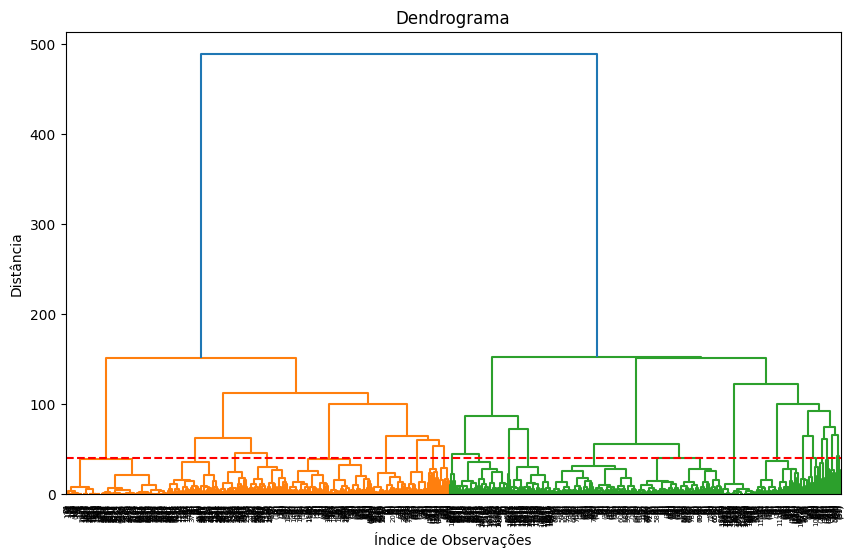

In [33]:
# Desabilitando os FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Selecionando variáveis de agrupamento e realizar tratamentos
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

grouping_df = df[selected_vars].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df[numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Padronizando as variáveis numéricas
scaler = StandardScaler()
grouping_df[numeric_vars] = scaler.fit_transform(grouping_df[numeric_vars].copy())  # Crie uma cópia aqui também

# Calculando a matriz de ligação
linkage_matrix = linkage(grouping_df, method='ward')

# Plotando o dendrograma para escolher o número de clusters
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=10)
plt.title('Dendrograma')
plt.xlabel('Índice de Observações')
plt.ylabel('Distância')
plt.axhline(y=40, color='r', linestyle='--')  # Adicione essa linha para destacar o corte sugerido
plt.show()


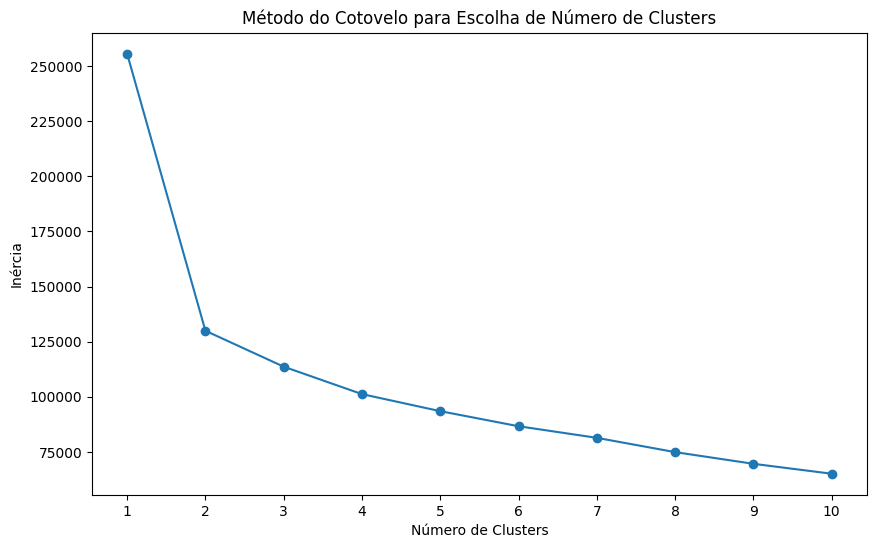

In [34]:
# Desabilitando os FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Selecionando variáveis de agrupamento e realizar tratamentos
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

grouping_df = df[selected_vars].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df[numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Padronizando as variáveis numéricas
scaler = StandardScaler()
grouping_df[numeric_vars] = scaler.fit_transform(grouping_df[numeric_vars])

# Calculando a inércia para diferentes números de clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(grouping_df)
    inertia.append(kmeans.inertia_)

# Plotando o gráfico do método do cotovelo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolha de Número de Clusters')
plt.xticks(range(1, 11))
plt.show()


In [37]:
# Desabilitando os FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Selecionando variáveis de agrupamento e realizar tratamentos
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

grouping_df = df[selected_vars].copy()  # Fazer uma cópia do DataFrame

numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df[numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Padronizando as variáveis numéricas
scaler = StandardScaler()
grouping_df[numeric_vars] = scaler.fit_transform(grouping_df[numeric_vars])

# Escolher o número de clusters com base no método do cotovelo
num_clusters = 3

# Realizando agrupamento com o número de clusters escolhido
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
grouping_df['Cluster'] = kmeans.fit_predict(grouping_df[numeric_vars])

# Análise descritiva para o agrupamento final
for cluster in range(num_clusters):
    cluster_data = grouping_df[grouping_df['Cluster'] == cluster]
    print(f"Cluster {cluster+1} - Total de observações: {len(cluster_data)}")
    print(cluster_data[numeric_vars].describe())
    print("\n")

# Contagens de observações para cada cluster
cluster_counts = grouping_df['Cluster'].value_counts()
print("Contagens de observações para cada cluster:")
print(cluster_counts)


Cluster 1 - Total de observações: 9680
       Administrative  Administrative_Duration  Informational  \
count     9680.000000              9680.000000    9680.000000   
mean        -0.181871                -0.166735      -0.225021   
std          0.701329                 0.517601       0.485803   
min         -0.696993                -0.457191      -0.396478   
25%         -0.696993                -0.457191      -0.396478   
50%         -0.395938                -0.437392      -0.396478   
75%          0.206173                -0.064029      -0.396478   
max          3.517781                 5.160216       3.540205   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count             9680.000000     9680.000000              9680.000000   
mean                -0.186451       -0.176480                -0.167663   
std                  0.260261        0.505644                 0.491268   
min                 -0.244931       -0.713488                -0.624348   
25%  

## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [36]:
# Desabilitando os FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Selecionando variáveis de agrupamento e realizar tratamentos
selected_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                 'SpecialDay', 'Month', 'Weekend']

grouping_df = df[selected_vars].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

numeric_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
grouping_df[numeric_vars] = grouping_df[numeric_vars].fillna(grouping_df[numeric_vars].mean())

month_mapping = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
                 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
grouping_df['Month'] = grouping_df['Month'].map(month_mapping)
grouping_df['Weekend'] = grouping_df['Weekend'].astype(int)

# Padronizando as variáveis numéricas
scaler = StandardScaler()
grouping_df[numeric_vars] = scaler.fit_transform(grouping_df[numeric_vars])

# Realizando a clusterização
kmeans = KMeans(n_clusters=3, random_state=0)
grouping_df['Cluster'] = kmeans.fit_predict(grouping_df)

# Adicionando a variável 'Revenue' aos clusters
grouping_df['Revenue'] = df['Revenue']

# Calculando a proporção de clientes com receita em cada cluster
cluster_revenue_props = grouping_df.groupby('Cluster')['Revenue'].mean()

# Imprimindo as proporções
print("Proporção de clientes com receita em cada cluster:")
print(cluster_revenue_props)

# Identificando o cluster com a maior proporção de clientes com receita
most_revenue_cluster = cluster_revenue_props.idxmax()

print("\nO cluster mais propenso à compra é o Cluster:", most_revenue_cluster)


Proporção de clientes com receita em cada cluster:
Cluster
0    0.105055
1    0.182947
2    0.328306
Name: Revenue, dtype: float64

O cluster mais propenso à compra é o Cluster: 2
